In [44]:
#loading data from /data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train1 = pd.read_parquet(
    '/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/training_data/train1.parquet')
train2 = pd.read_parquet(
    '/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/training_data/train2.parquet')
train3 = pd.read_parquet(
    '/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/training_data/train3.parquet')
train = pd.concat([train1, train2, train3], axis=0)

test1 = pd.read_parquet(
    '/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/testing_data/test1.parquet')
test2 = pd.read_parquet(
    '/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/testing_data/test2.parquet')
test3 = pd.read_parquet(
    '/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/testing_data/test3.parquet')
test = pd.concat([test1, test2, test3], axis=0)


In [57]:
train.shape

(225, 34)

In [56]:
test.shape

(3971198, 33)

In [47]:
new = ['machine_id', 'security_product_name', 'machine_version', 'app_version', 'av_sig_version', 'is_beta', 'rtp_state', 'av_status', 'platform', 'processor', 'os_version', 'os_build', 'os_suite', 'os_ptfm_sub_release', 'os_build_lab', 'is_protected', 'pua_mode',
       's_mode', 'smart_screen', 'firewall', 'uac_luaenable', 'version', 'architecture', 'branch', 'build_number', 'build_revision', 'edition', 'install_type_name', 'state_name', 'flighting_status', 'flights_activity', 'flight_ring', 'secure_boot_status', 'malware_status']

#taking all the columns that are not in the new list and dropping them
train = train.drop([col for col in train.columns if col not in new], axis=1)
test = test.drop([col for col in test.columns if col not in new], axis=1)

#save csv
""" train.to_csv('/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/train.csv', index=False)
test.to_csv('/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/test.csv', index=False)
 """


" train.to_csv('/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/train.csv', index=False)\ntest.to_csv('/Users/abdul/Desktop/Programming/HOD-CPP2nite/data/test.csv', index=False)\n "

In [48]:
#removing records with null value in any of its column


#imputing with mode
""" train = train.fillna(train.mode().iloc[0])
test = test.fillna(test.mode().iloc[0]) """
train = train.dropna()

In [36]:
print(train.shape)
print(test.shape)
print(test)
print(train)

(225, 34)
(165, 33)
                    security_product_name machine_version       app_version  \
__null_dask_index__                                                           
180                          win8defender     1.1.15200.1   4.18.1807.18075   
978                          win8defender     1.1.15100.1   4.18.1807.18075   
1213                         win8defender     1.1.15200.1   4.18.1807.18075   
1782                         win8defender     1.1.15200.1   4.18.1807.18075   
2708                         win8defender     1.1.15100.1   4.18.1807.18075   
...                                   ...             ...               ...   
109473                       win8defender     1.1.15100.1   4.18.1806.18062   
114100                       win8defender     1.1.15100.1  4.12.17007.18022   
114212                       win8defender     1.1.15100.1   4.18.1806.18062   
124092                       win8defender     1.1.15100.1   4.18.1807.18075   
125763                       win

In [49]:
print(train.columns)
print(train.shape)
train['malware_status'].value_counts()

Index(['security_product_name', 'machine_version', 'app_version',
       'av_sig_version', 'is_beta', 'rtp_state', 'av_status', 'platform',
       'processor', 'os_version', 'os_build', 'os_suite',
       'os_ptfm_sub_release', 'os_build_lab', 'is_protected', 'pua_mode',
       's_mode', 'smart_screen', 'firewall', 'uac_luaenable', 'version',
       'architecture', 'branch', 'build_number', 'build_revision', 'edition',
       'install_type_name', 'state_name', 'flighting_status',
       'flights_activity', 'flight_ring', 'secure_boot_status',
       'malware_status', 'machine_id'],
      dtype='object')
(225, 34)


1    185
0     40
Name: malware_status, dtype: int64

(180, 33)
(45, 33)
(180,)
(45,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1]
0.8888888888888888
[[ 2  4]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.90      0.97      0.94        39

    accuracy                           0.89        45
   macro avg       0.79      0.65      0.69        45
weighted avg       0.87      0.89      0.87        45

0.6538461538461539


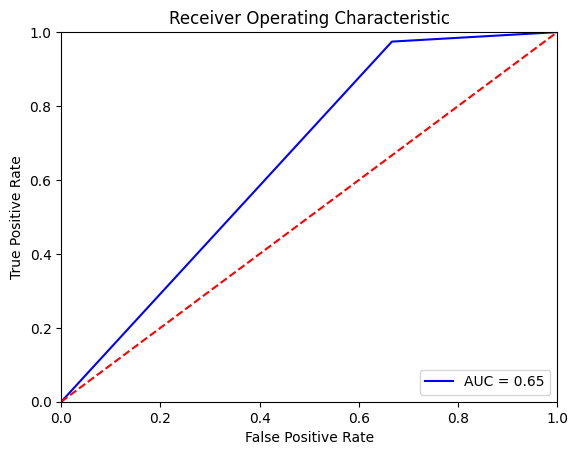

In [50]:
#make the classifier model based on the extra column present in the train set and not in the test set
#this is the malware_status column
#this is the column that we are trying to predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_train_encoded = train.apply(le.fit_transform)


#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(new_train_encoded.drop(
    ['malware_status'], axis=1), new_train_encoded['malware_status'], test_size=0.2, random_state=42)


#display the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)
print(y_pred)

#display the accuracy score
print(accuracy_score(y_test, y_pred))

#display the confusion matrix
print(confusion_matrix(y_test, y_pred))

#display the classification report
print(classification_report(y_test, y_pred))

#display the roc_auc_score
print(roc_auc_score(y_test, y_pred))

#display the roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [51]:
#display the accuracy score
print(accuracy_score(y_test, y_pred))

#display the confusion matrix
print(confusion_matrix(y_test, y_pred))

#display the classification report
print(classification_report(y_test, y_pred))

0.8888888888888888
[[ 2  4]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.90      0.97      0.94        39

    accuracy                           0.89        45
   macro avg       0.79      0.65      0.69        45
weighted avg       0.87      0.89      0.87        45



In [52]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#display the accuracy score
print(accuracy_score(y_test, y_pred))

#display the confusion matrix
print(confusion_matrix(y_test, y_pred))

#display the classification report
print(classification_report(y_test, y_pred))


0.8222222222222222
[[ 2  4]
 [ 4 35]]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.90      0.90      0.90        39

    accuracy                           0.82        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.82      0.82      0.82        45



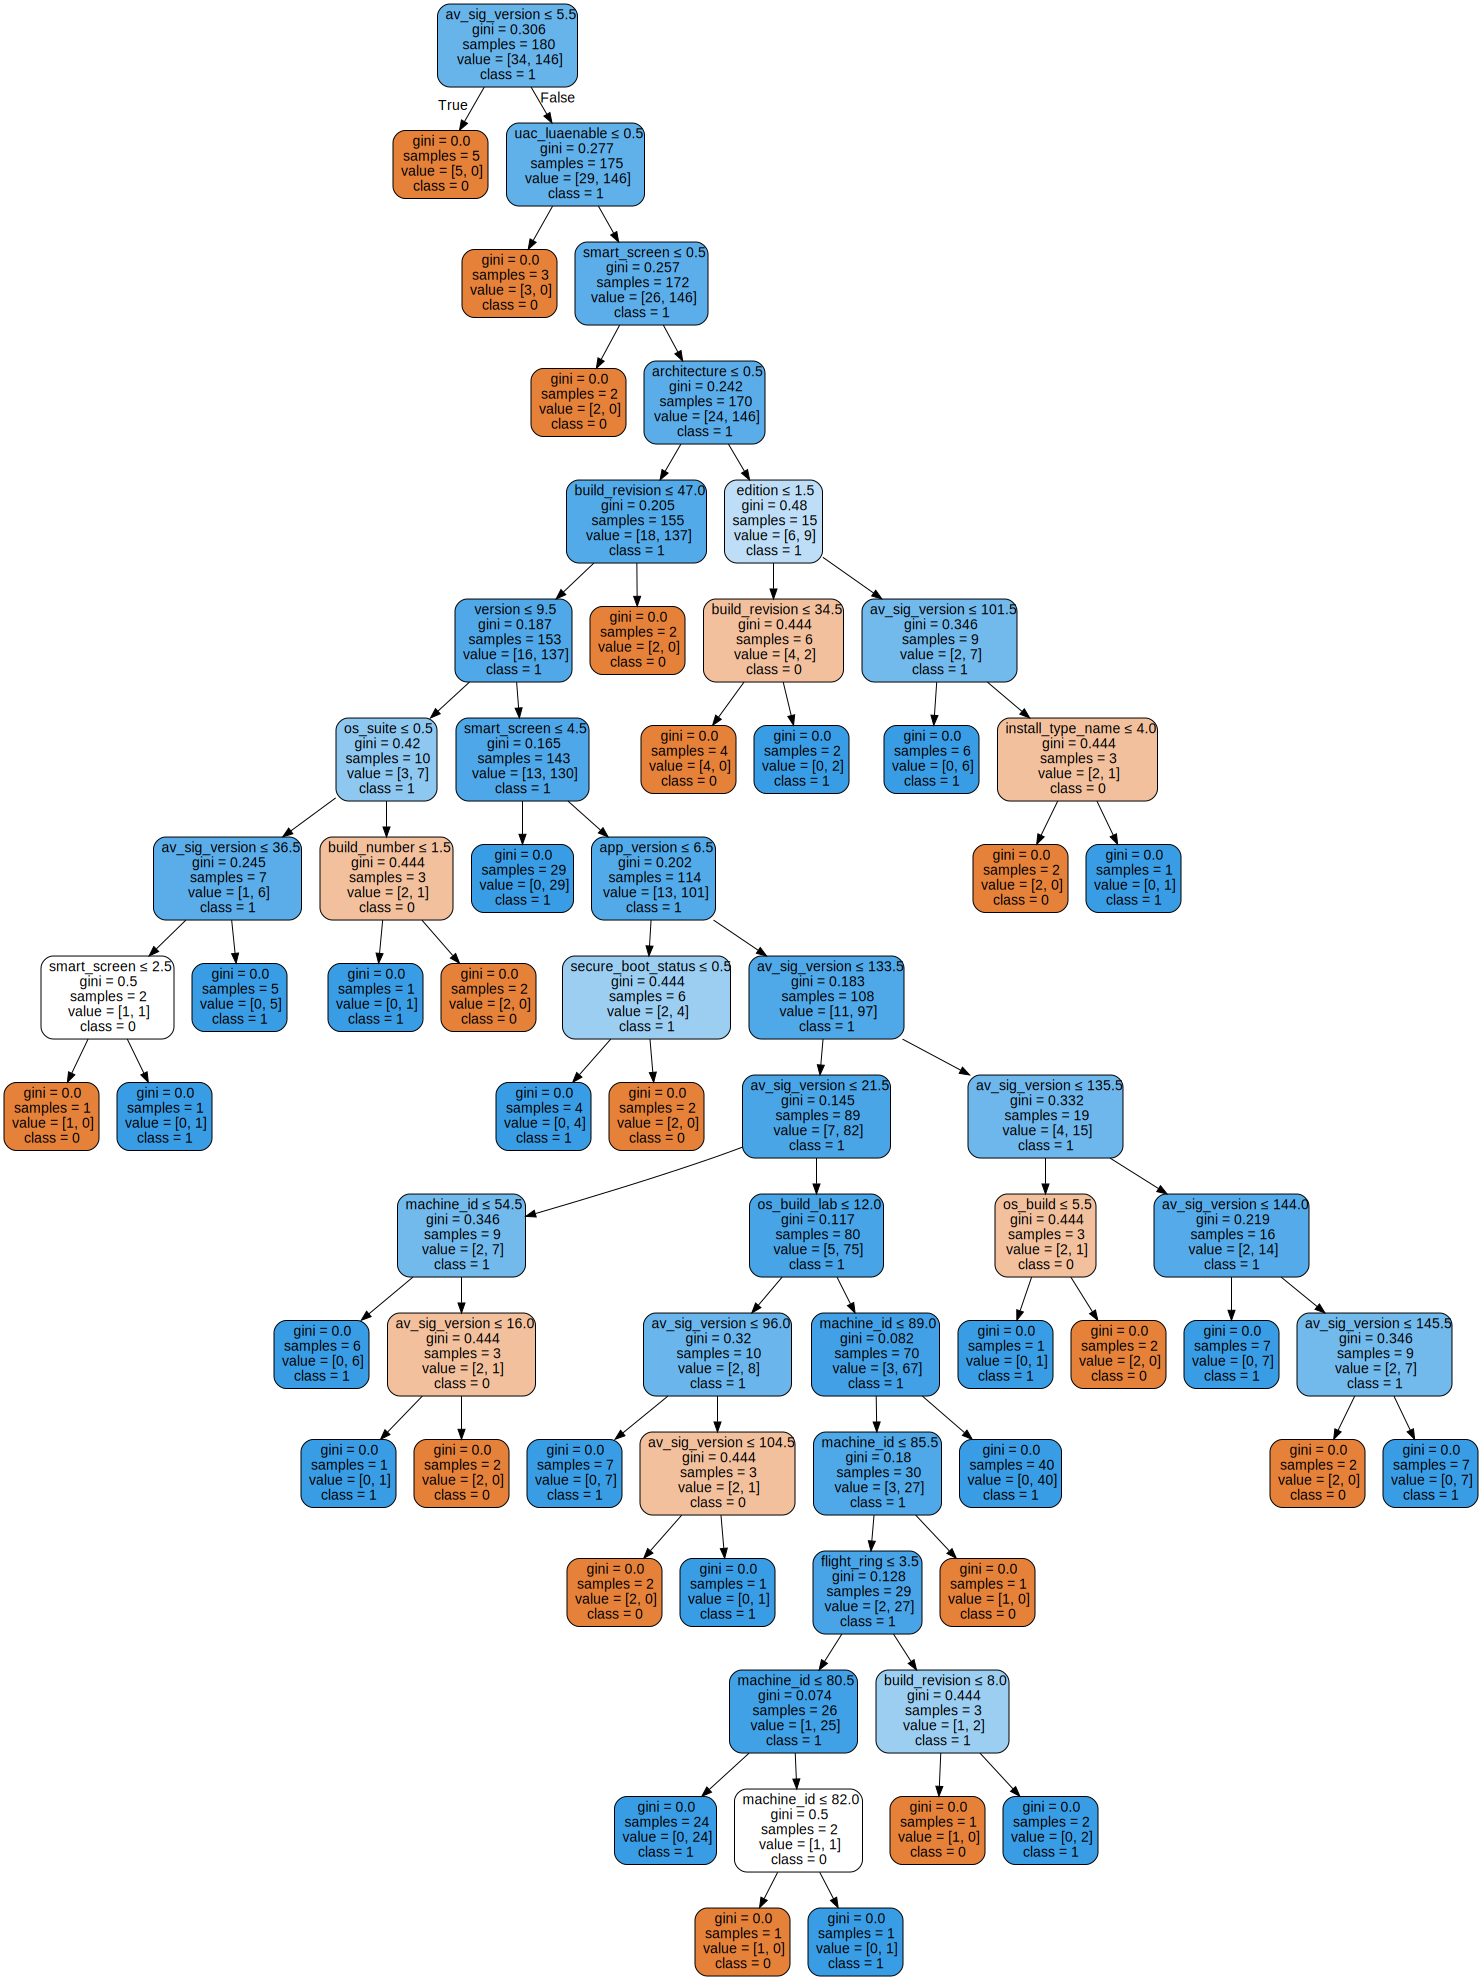

In [53]:
#draw decision tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("microsoft")

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['0', '1'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph


Logistic Regression: 0.844444
KNN: 0.844444
SVM: 0.866667
Naive Bayes: 0.844444
Random Forest: 0.888889
Gradient Boosting: 0.844444
Ada Boost: 0.866667
Bagging: 0.844444
Decision Tree: 0.800000
MLP: 0.866667
Logistic Regression
[[ 0  6]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      0.97      0.92        39

    accuracy                           0.84        45
   macro avg       0.43      0.49      0.46        45
weighted avg       0.75      0.84      0.79        45

0.48717948717948717


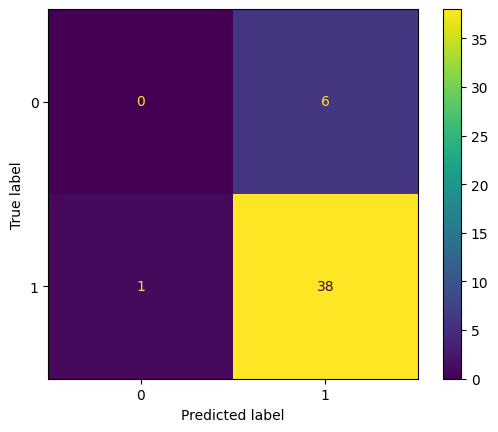

KNN
[[ 1  5]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.88      0.95      0.91        39

    accuracy                           0.84        45
   macro avg       0.61      0.56      0.57        45
weighted avg       0.81      0.84      0.82        45

0.5576923076923076


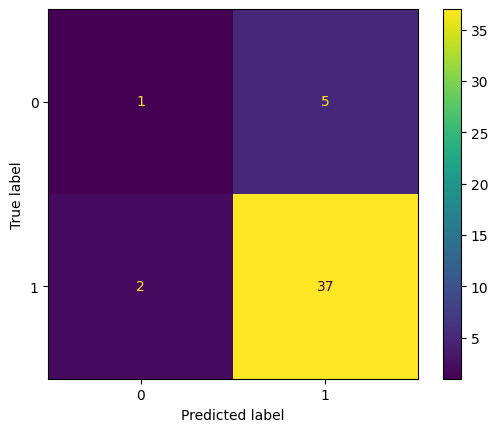

SVM
[[ 0  6]
 [ 0 39]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      1.00      0.93        39

    accuracy                           0.87        45
   macro avg       0.43      0.50      0.46        45
weighted avg       0.75      0.87      0.80        45

0.5


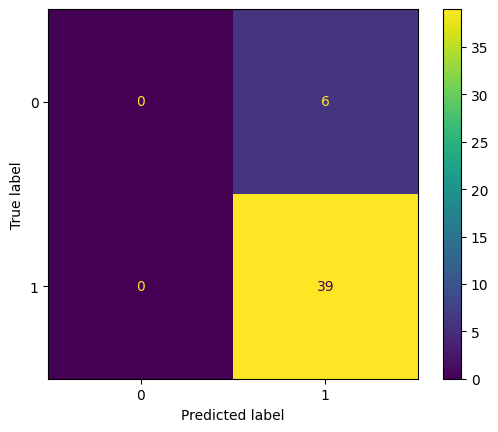

Naive Bayes
[[ 4  2]
 [ 5 34]]
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.94      0.87      0.91        39

    accuracy                           0.84        45
   macro avg       0.69      0.77      0.72        45
weighted avg       0.88      0.84      0.86        45

0.7692307692307694


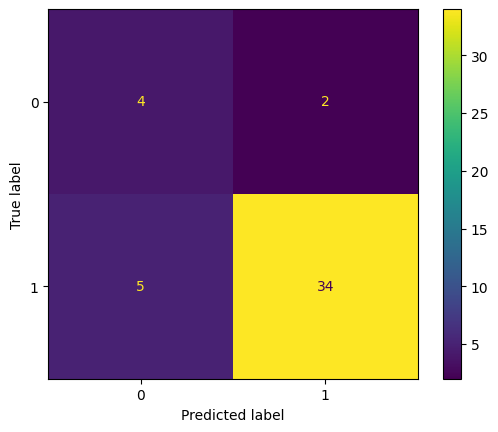

Random Forest
[[ 2  4]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.90      0.97      0.94        39

    accuracy                           0.89        45
   macro avg       0.79      0.65      0.69        45
weighted avg       0.87      0.89      0.87        45

0.6538461538461539


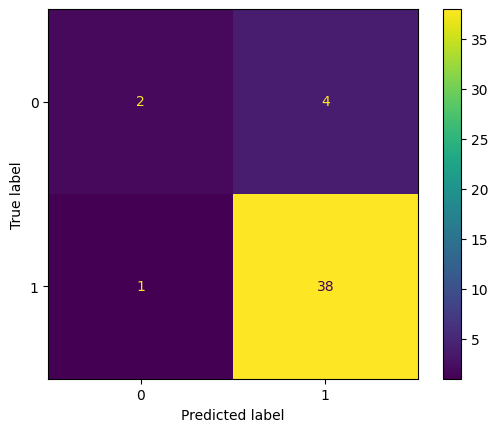

Gradient Boosting
[[ 1  5]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.88      0.95      0.91        39

    accuracy                           0.84        45
   macro avg       0.61      0.56      0.57        45
weighted avg       0.81      0.84      0.82        45

0.5576923076923076


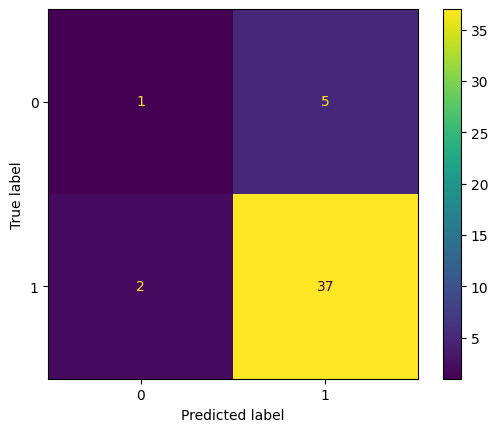

Ada Boost
[[ 2  4]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.90      0.95      0.92        39

    accuracy                           0.87        45
   macro avg       0.70      0.64      0.66        45
weighted avg       0.85      0.87      0.85        45

0.641025641025641


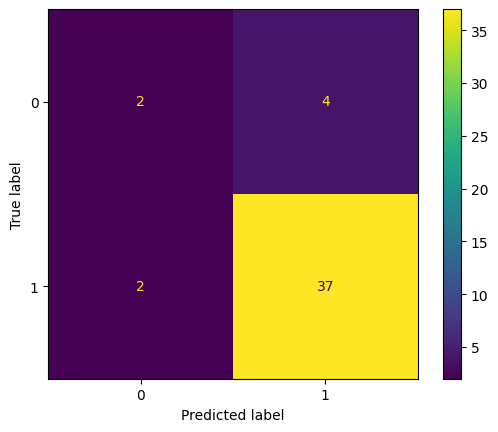

Bagging
[[ 2  4]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.90      0.97      0.94        39

    accuracy                           0.89        45
   macro avg       0.79      0.65      0.69        45
weighted avg       0.87      0.89      0.87        45

0.6538461538461539


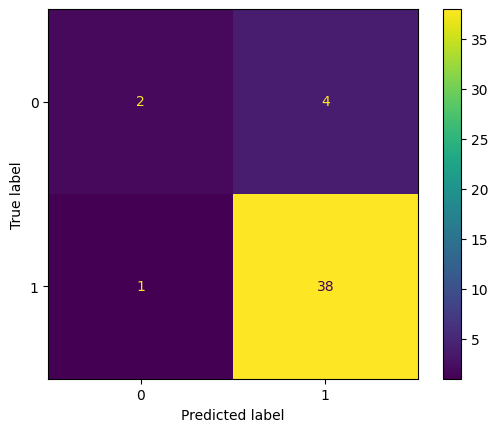

Decision Tree
[[ 1  5]
 [ 4 35]]
              precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.88      0.90      0.89        39

    accuracy                           0.80        45
   macro avg       0.54      0.53      0.53        45
weighted avg       0.79      0.80      0.79        45

0.532051282051282


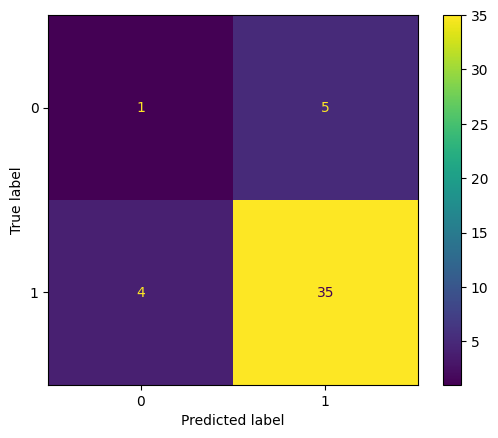

MLP
[[ 0  6]
 [ 0 39]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      1.00      0.93        39

    accuracy                           0.87        45
   macro avg       0.43      0.50      0.46        45
weighted avg       0.75      0.87      0.80        45

0.5


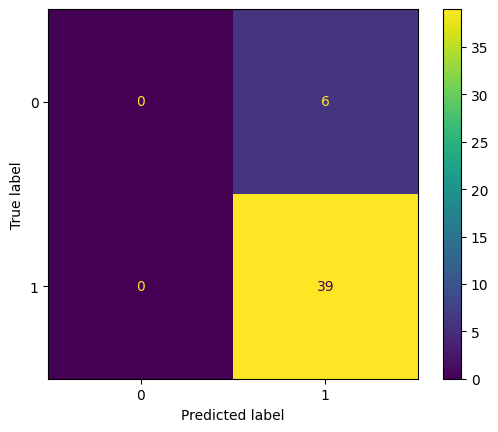

Logistic Regression


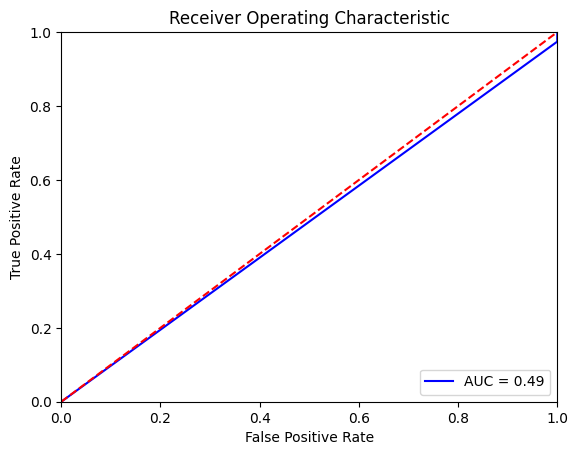

KNN


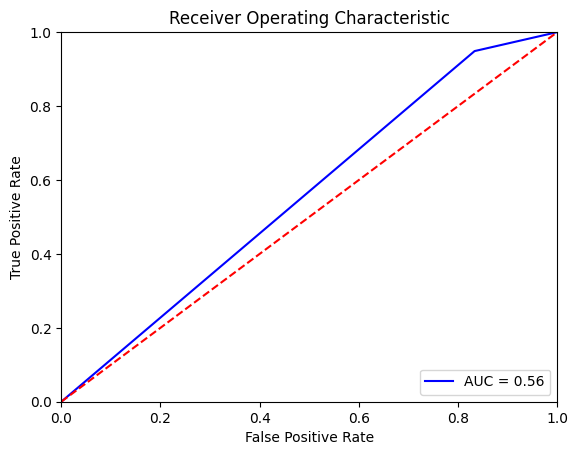

SVM


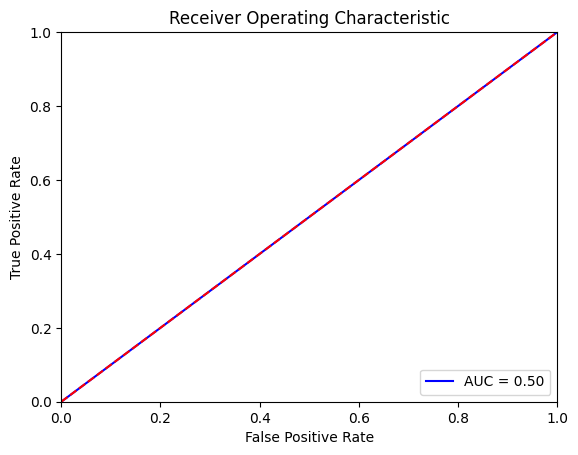

Naive Bayes


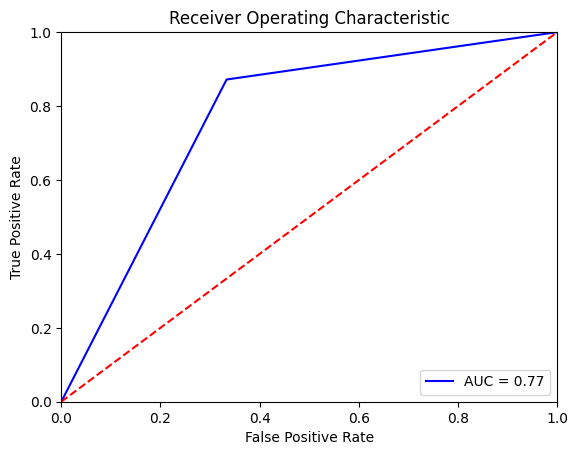

Random Forest


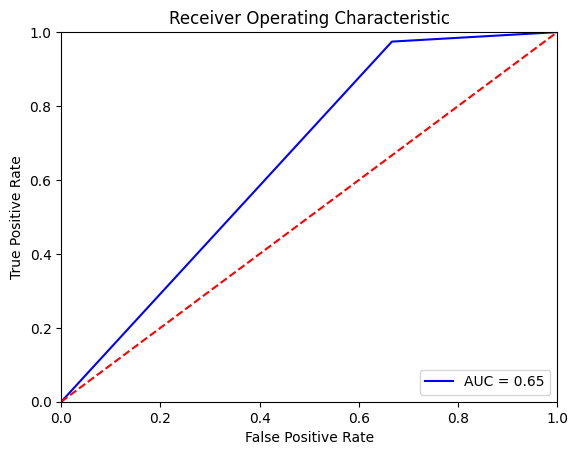

Gradient Boosting


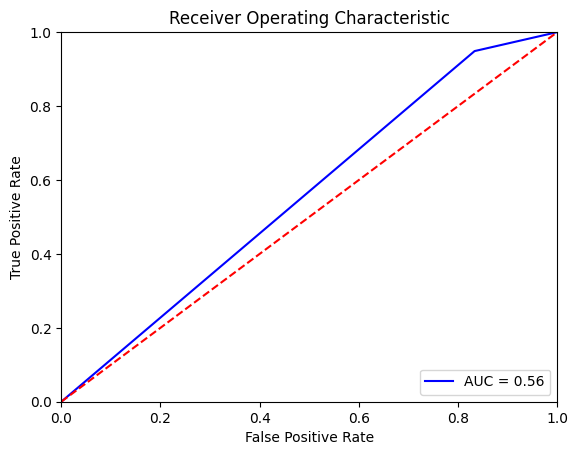

Ada Boost


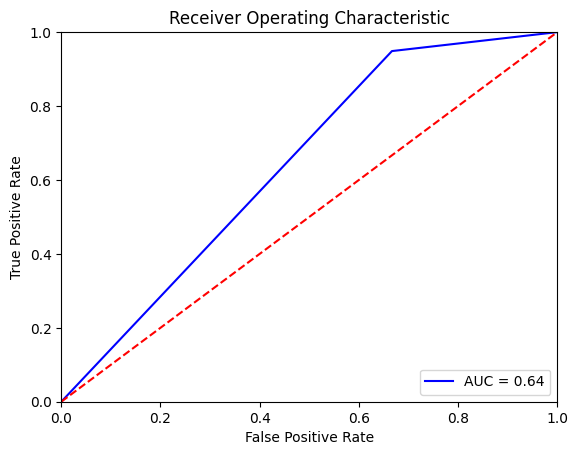

Bagging


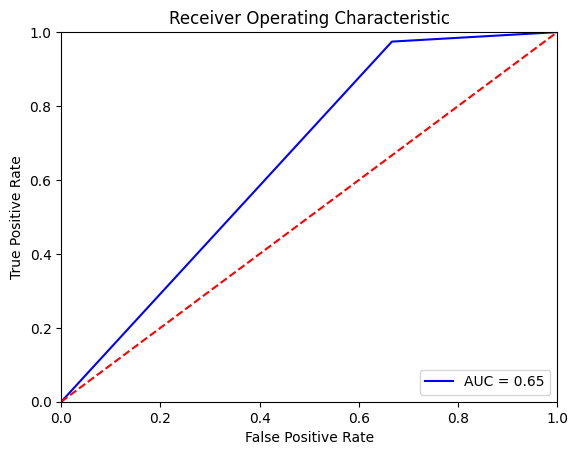

Decision Tree


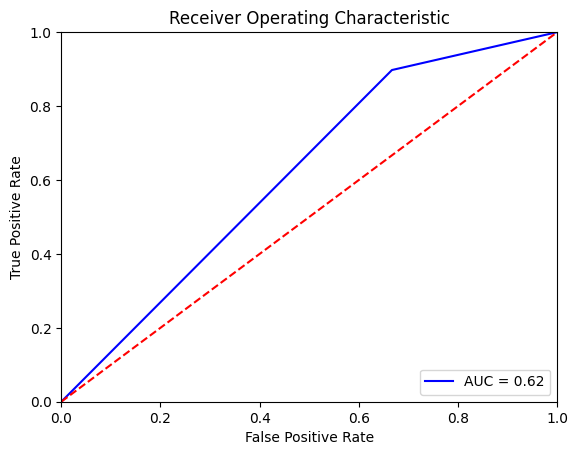

MLP


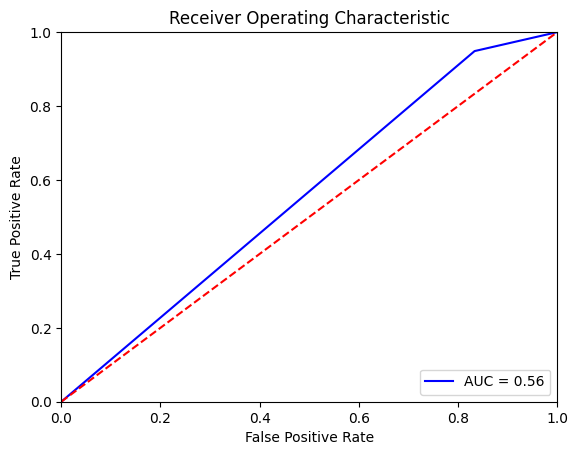

Logistic Regression
0.8444444444444444
KNN
0.8444444444444444
SVM
0.8666666666666667
Naive Bayes
0.8444444444444444
Random Forest
0.8888888888888888
Gradient Boosting
0.8444444444444444
Ada Boost
0.8666666666666667
Bagging
0.7777777777777778
Decision Tree
0.8
MLP
0.8666666666666667
Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      0.97      0.92        39

    accuracy                           0.84        45
   macro avg       0.43      0.49      0.46        45
weighted avg       0.75      0.84      0.79        45

KNN
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.88      0.95      0.91        39

    accuracy                           0.84        45
   macro avg       0.61      0.56      0.57        45
weighted avg       0.81      0.84      0.82        45

SVM
              precision    recall  

In [54]:
# classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings("ignore")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_train_encoded = train.apply(le.fit_transform)

#value error: x_test expected 33 features, got 32




# list of models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('MLP', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    names.append(name)
    msg = "%s: %f" % (name, accuracy)
    print(msg)


#display the confusion matrix for all the algorithms
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

#display the roc_curve for all the algorithms
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(name)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


#display the accuracy score for all the algorithms
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))

#display the classification report for all the algorithms
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))

#display the roc_auc_score for all the algorithms
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    #print model name
    print(roc_auc_score(y_test, y_pred))

    

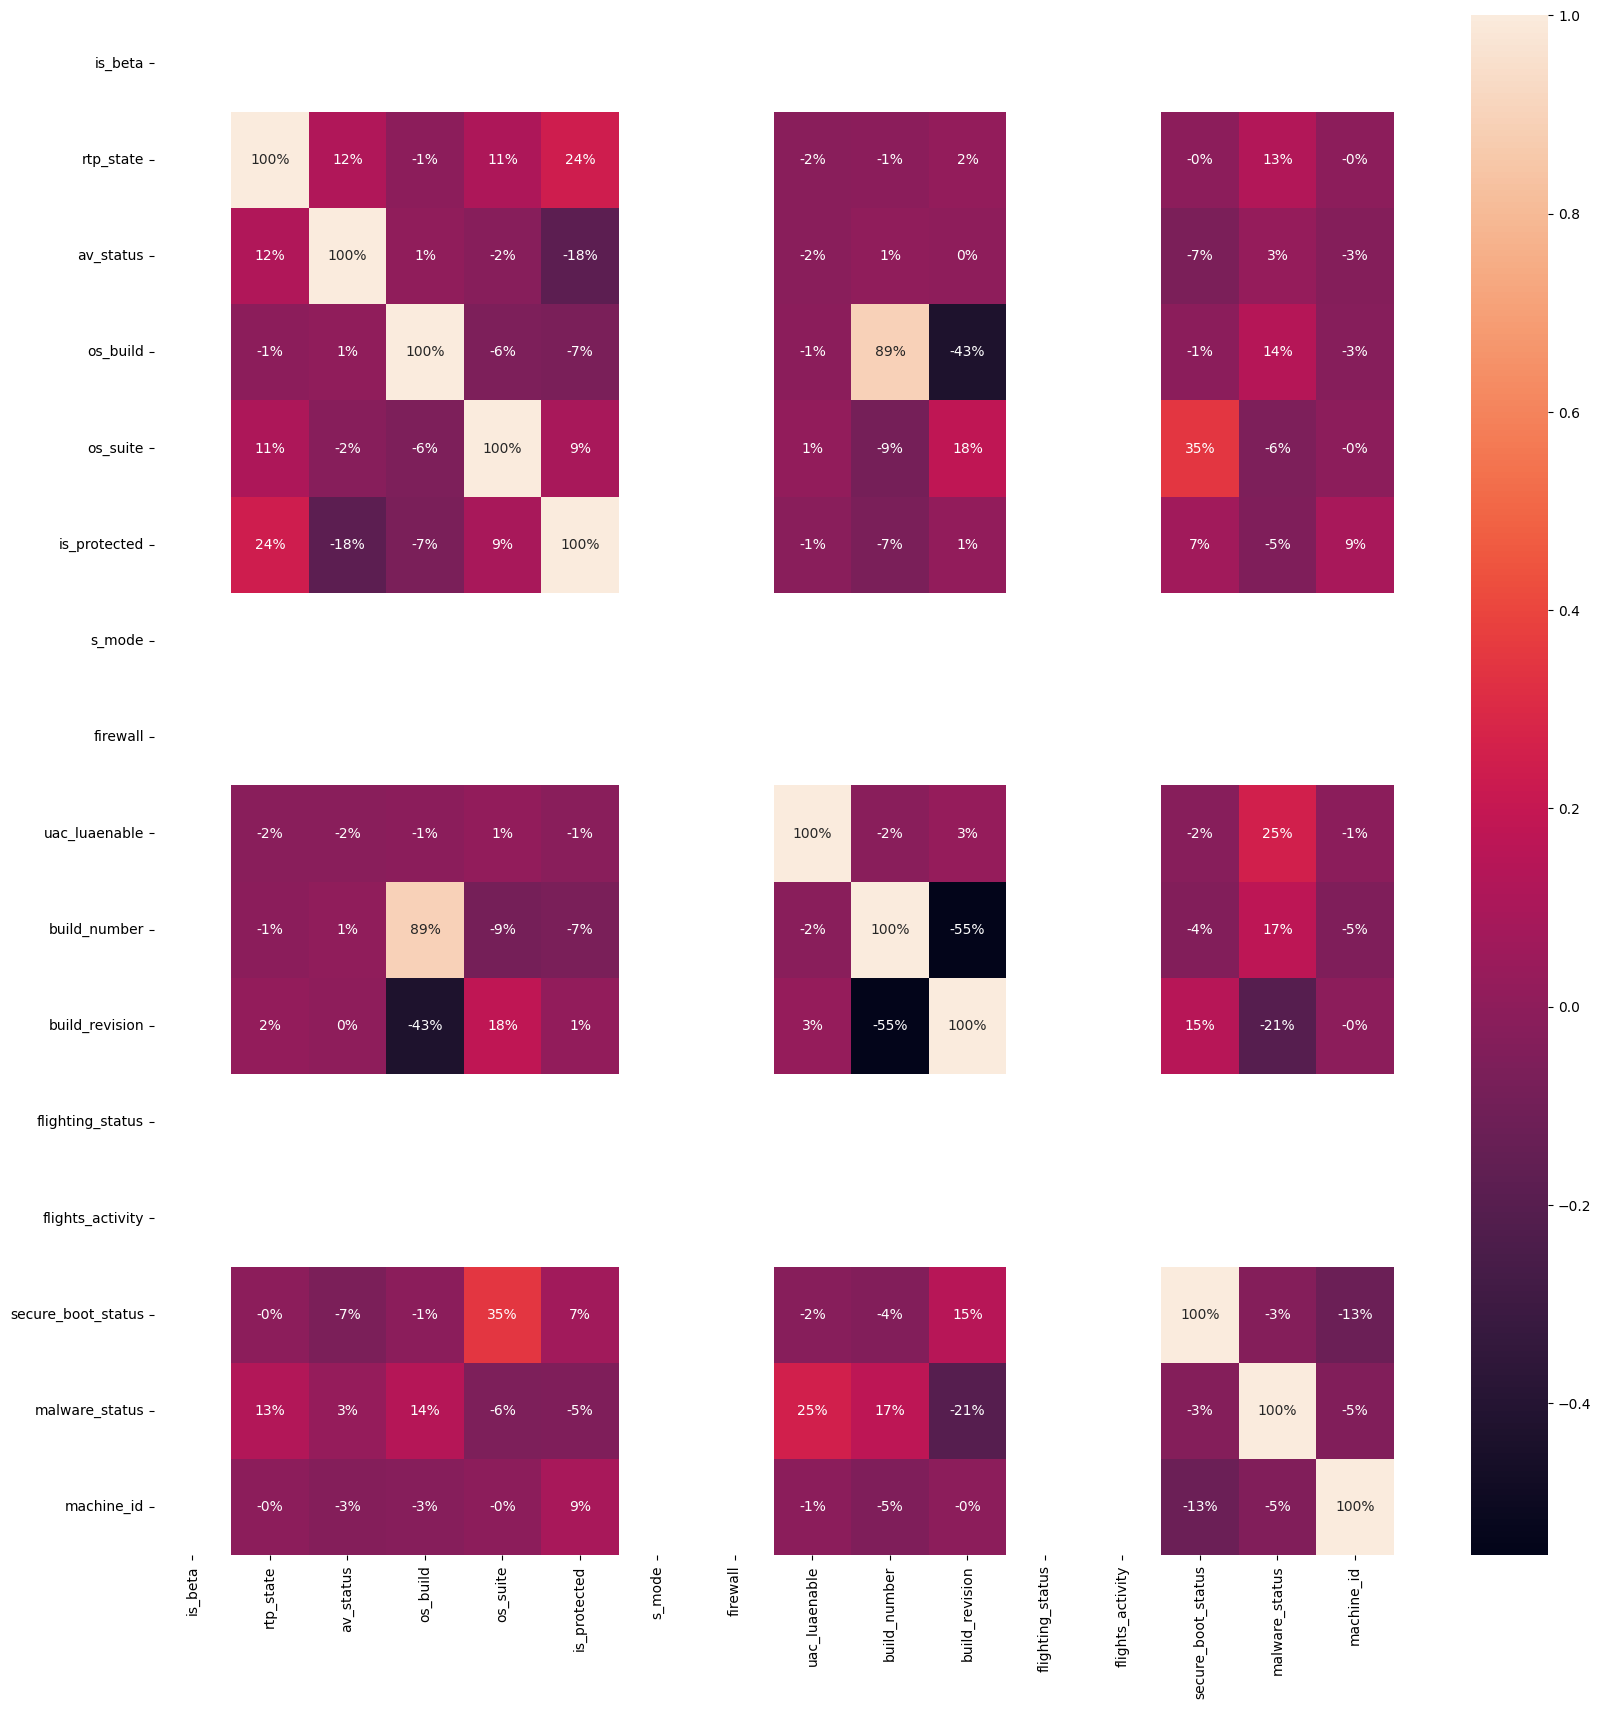

In [55]:
import seaborn as sns
train.corr()
#plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True, fmt='.0%')
plt.show()
